In [1504]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [1505]:
culture = pd.read_csv('refine_df_12_16_LoRo.csv', usecols=["institution", "montant", "domaine","details","start", "end"])
sport = pd.read_csv('refined_df_sport_Loro.csv', usecols=["institution", "montant", "domaine", "start", "end"])
extra = pd.read_csv('sport_files_loro/Loro_extras.csv')
extras_culture = pd.read_csv('extras_culture.csv')

# ! Some nan values from "details" column after Google Refine

In [1506]:
len(culture)

3126

In [1507]:
len(sport)

4136

In [1508]:
extras_culture

,institution,montant,start,end,domaine
0,MCBA,5000000,2016,2017,extra_culture
1,Plateforme10,10000000,2017,2018,extra_culture


## Add column based on source

In [1509]:
culture['source'] = 'Organe cantonal'
sport['source'] = 'FFSV'
extra['source'] = 'FFSV'
extras_culture['source'] = 'Organe cantonal'

## Merge

In [1510]:
df_all = pd.concat([culture, sport, extra, extras_culture])

In [1511]:
len(df_all)

7269

In [1605]:
df_all[df_all['institution'].str.contains('Ruchonnet')]

,details,domaine,end,institution,montant,source,start
615,NaN,9.-Centres sportifs,2016,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,3447325.0,FFSV,2015
1269,NaN,9.-Centres sportifs,2015,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,2002484.0,FFSV,2014
2025,NaN,9.-Centres sportifs,2018,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,270000.0,FFSV,2017
2696,NaN,9.-Centres sportifs,2014,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,2000000.0,FFSV,2013
3401,NaN,9.-Centres sportifs,2017,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,5400000.0,FFSV,2016
4134,NaN,9.-Centres sportifs,2013,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,1000000.0,FFSV,2012


## Limit 2012-2016

In [1513]:
df = df_all[(df_all['start'] >= 2012)]
df = df[df['end'] <= 2017]

In [1514]:
len(df)

6511

In [1515]:
df['start'].value_counts()

2016    1358
2012    1333
2013    1305
2014    1272
2015    1243
Name: start, dtype: int64

In [1606]:
df[df['institution'].str.contains("Ruchonnet")]['montant'].sum()

13849809.0

In [1517]:
df[df['institution'].str.contains("Commune")]

,details,domaine,end,institution,montant,source,start
129,NaN,3.-Locaux sportifs,2016,Commune d'Aubonne - Réfection du terrain de beach-volley de la piscine communale,1700.0,FFSV,2015
130,NaN,3.-Locaux sportifs,2016,Commune de Cheseaux-sur-Lausanne,40000.0,FFSV,2015
131,NaN,3.-Locaux sportifs,2016,Commune de Gryon - Rénovation de deux courts de tennis extérieurs,27200.0,FFSV,2015
132,NaN,3.-Locaux sportifs,2016,Commune de Lausanne,100000.0,FFSV,2015
133,NaN,3.-Locaux sportifs,2016,Commune de Lausanne,65000.0,FFSV,2015
134,NaN,3.-Locaux sportifs,2016,Commune de Lausanne,4240.0,FFSV,2015
135,NaN,3.-Locaux sportifs,2016,Commune de Moudon,7900.0,FFSV,2015
136,NaN,3.-Locaux sportifs,2016,Commune de Rolle - Rénovation de deux courts de tennis extérieurs et d'un mur d'entraînement,64000.0,FFSV,2015
137,NaN,3.-Locaux sportifs,2016,Commune de Romanel -s/Lsne - Mise à neuf de l'entier des équip. de l'éclairage du terrain de football,8130.0,FFSV,2015
138,NaN,3.-Locaux sportifs,2016,Commune de Saint-Barthélemy,20000.0,FFSV,2015


In [1518]:
17500+1408500

1426000

## Change data type for dates

In [1519]:
df['start'] = pd.to_datetime(df['start'], format='%Y')
df['end'] = pd.to_datetime(df['end'], format='%Y')
type(df['end'])

pandas.core.series.Series

## Explore repartion

### By source

In [1584]:
len(df)

6511

In [1520]:
df['montant'].sum()

235612741.04

In [1583]:
len(df['institution'].value_counts())

3497

In [1522]:
#counting = df['institution'].drop_duplicates()
#len(counting)

In [1523]:
df.groupby('start')['montant'].sum()

start
2012-01-01    43862198.30
2013-01-01    47399857.11
2014-01-01    46537532.76
2015-01-01    43258905.16
2016-01-01    54554247.71
Name: montant, dtype: float64

In [1524]:
df.groupby(['start', 'source'])['montant'].sum() / df.groupby('start')['montant'].sum() * 100

start       source         
2012-01-01  FFSV               23.271146
            Organe cantonal    76.728854
2013-01-01  FFSV               22.731404
            Organe cantonal    77.268596
2014-01-01  FFSV               21.563820
            Organe cantonal    78.436180
2015-01-01  FFSV               22.193750
            Organe cantonal    77.806250
2016-01-01  FFSV               23.249980
            Organe cantonal    76.750020
Name: montant, dtype: float64

In [1525]:
df.groupby(['source'])['montant'].sum()

source
FFSV               5.330178e+07
Organe cantonal    1.823110e+08
Name: montant, dtype: float64

In [1526]:
df.groupby(['source'])['montant'].sum()/df['montant'].sum()*100

source
FFSV               22.622624
Organe cantonal    77.377376
Name: montant, dtype: float64

### By domain

In [1527]:
df['montant'].sum()

235612741.04

In [1528]:
df.groupby(['domaine'])['montant'].sum()

domaine
1.-Associations                         6615030.00 
2.-Camps sp., sp. scol. & CS            3271307.45 
3.-Locaux sportifs                      16985900.00
4.-Matériel sportif                     947555.00  
5.-Manifestation sportives              3049288.40 
6.-Clubs élites                         4005389.50 
7.-Dévelop. qualit. sport               1014103.55 
8.-FASV & Bourses                       2206287.40 
9.-Centres sportifs                     13866287.55
Action sociale / personnes âgées        26714134.00
Culture                                 90392844.00
Environnement                           3110750.00 
Extra sport                             1340635.19 
Formation et recherche                  2280000.00 
Jeunesse et éducation                   16884289.00
Patrimoine                              10783200.00
Promotion, tourisme et développement    12469800.00
Santé et handicap                       14675940.00
extra_culture                           5000000.00 
Name

In [1529]:
df.groupby(['domaine'])['montant'].sum()/df['montant'].sum()*100

domaine
1.-Associations                         2.807586 
2.-Camps sp., sp. scol. & CS            1.388426 
3.-Locaux sportifs                      7.209245 
4.-Matériel sportif                     0.402166 
5.-Manifestation sportives              1.294195 
6.-Clubs élites                         1.699988 
7.-Dévelop. qualit. sport               0.430411 
8.-FASV & Bourses                       0.936404 
9.-Centres sportifs                     5.885203 
Action sociale / personnes âgées        11.338153
Culture                                 38.365007
Environnement                           1.320281 
Extra sport                             0.568999 
Formation et recherche                  0.967690 
Jeunesse et éducation                   7.166119 
Patrimoine                              4.576663 
Promotion, tourisme et développement    5.292498 
Santé et handicap                       6.228840 
extra_culture                           2.122126 
Name: montant, dtype: float64

## Biggest amounts overall

### Top 50 Mixed

In [1581]:
df_sum = df.groupby('institution')['montant'].sum().reset_index(name="sum").sort_values('sum', ascending=False)

In [1607]:
df_sum[:50]

,institution,sum
2255,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,13849809.00
2409,"Fondation pour l'accueil de jour des enfants FAJE, Lausanne",7500000.00
2917,MCBA,5000000.00
2986,"Office du Tourisme du Canton de Vaud, Lausanne",5000000.00
2570,"Fondation romande pour le cinéma - cinéforom, Genève",3500000.00
1539,Camps sportifs scolaires - Total pour les établissements scolaires vaudois,2861449.00
2564,"Fondation pour l'art dramatique - Théâtre de Vidy, Lausanne",2170000.00
1408,"Association pour la restauration de l'Abbatiale de Payerne, Payerne",2150000.00
2415,"Fondation Ballet Béjart, Lausanne",1960000.00
2401,"Fond. pour l'art musical, lyrique et chorégraphique - Opéra de Lausanne, Lausanne",1860000.00


In [1573]:
#df_sum[:50].to_csv('top50vendredi.csv')

### Top 50 Sport

In [1534]:
df_sport = df[df['source'] == 'FFSV']

In [1579]:
#df_sport.groupby('institution')['montant'].sum().reset_index(name="sum").sort_values('sum', ascending=False)[:20]

### Top 50 culture

In [1580]:
df_culture = df[df['source'] == 'Organe cantonal']
#df_culture.groupby('institution')['montant'].sum().reset_index(name="sum").sort_values('sum', ascending=False)


## Number of institutions by year

In [1537]:
df.groupby(['start'])['institution'].count()

start
2012-01-01    1333
2013-01-01    1305
2014-01-01    1272
2015-01-01    1243
2016-01-01    1358
Name: institution, dtype: int64

In [1538]:
len(df.groupby('institution').sum())

3497

In [1539]:
df.groupby(['start'])['institution'].count().mean()

1302.2

In [1540]:
len(df)

6511

In [1541]:
len(df.groupby(['institution']))

3497

In [1542]:
len(df)

6511

## Size of contributions

In [1543]:
df.groupby('start')['montant'].median()

start
2012-01-01    6000.0
2013-01-01    7800.0
2014-01-01    8000.0
2015-01-01    8000.0
2016-01-01    6000.0
Name: montant, dtype: float64

In [1544]:
df.groupby('start')['montant'].median().mean()

7160.0

In [1545]:
len(df)

6511

In [1546]:
df.groupby('start').size()

start
2012-01-01    1333
2013-01-01    1305
2014-01-01    1272
2015-01-01    1243
2016-01-01    1358
dtype: int64

In [1547]:
df.groupby('start').size().mean()

1302.2

In [1548]:
len(df[df['montant'] <= 2500])

2126

In [1549]:
len(df[df['montant'] <= 2500]) / len(df)

0.3265243434188297

In [1550]:
len(df[df['montant'] >= 20000]) / len(df)

0.3371217938872677

In [1551]:
len(df[(df['montant'] > 2500) & (df['montant']< 20000)])/len(df)

0.3363538626939026

In [1552]:
len(df[df['montant'] <= 2000]) / len(df) +len(df[df['montant'] >= 20000]) / len(df) +len(df[(df['montant'] > 2000) & (df['montant']< 20000)])/len(df)

1.0

In [1553]:
df[df['montant'] == df['montant'].min()]

,details,domaine,end,institution,montant,source,start
43,NaN,"2.-Camps sp., sp. scol. & CS",2016-01-01,Association Leysin Danse,59.0,FFSV,2015-01-01


In [1554]:
df[df['montant'] == df['montant'].max()]

,details,domaine,end,institution,montant,source,start
3401,NaN,9.-Centres sportifs,2017-01-01,Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin,5400000.0,FFSV,2016-01-01


## Search by exact terms

In [1603]:
df[df['institution'] == "Office du Tourisme du Canton de Vaud, Lausanne"]

,details,domaine,end,institution,montant,source,start
567,"Office du Tourisme du Canton de Vaud, Lausanne","Promotion, tourisme et développement",2013-01-01,"Office du Tourisme du Canton de Vaud, Lausanne",1000000.0,Organe cantonal,2012-01-01
1197,"Office du Tourisme du Canton de Vaud - OTV, Lausanne","Promotion, tourisme et développement",2017-01-01,"Office du Tourisme du Canton de Vaud, Lausanne",1000000.0,Organe cantonal,2016-01-01
1829,"Office du Tourisme du Canton de Vaud, Lausanne","Promotion, tourisme et développement",2015-01-01,"Office du Tourisme du Canton de Vaud, Lausanne",1000000.0,Organe cantonal,2014-01-01
2448,"Office du Tourisme du Canton de Vaud, Lausanne","Promotion, tourisme et développement",2016-01-01,"Office du Tourisme du Canton de Vaud, Lausanne",1000000.0,Organe cantonal,2015-01-01
3091,"Office du Tourisme du Canton de Vaud, Lausanne","Promotion, tourisme et développement",2014-01-01,"Office du Tourisme du Canton de Vaud, Lausanne",1000000.0,Organe cantonal,2013-01-01


## Text search

In [1612]:
df[df['institution'].str.contains("Montreux Volley Masters - Montreux Volley Masters")][['institution', 'montant', 'start','domaine']].sort_values('start')['montant']

3823    10000.0
2482    20000.0
2584    14000.0
1037    34000.0
3173    34000.0
3174    34000.0
Name: montant, dtype: float64

In [1611]:
146000+17000


163000

In [1609]:
df[df['institution'].str.contains("Games")]

,details,domaine,end,institution,montant,source,start
901,"Association Numerik Games, Cheseaux-Noréaz","Promotion, tourisme et développement",2017-01-01,"Association Numerik Games, Cheseaux-Noréaz",60000.0,Organe cantonal,2016-01-01


In [1557]:
df['domaine'].value_counts()

Culture                                 2063
5.-Manifestation sportives              1553
8.-FASV & Bourses                       431 
2.-Camps sp., sp. scol. & CS            424 
Action sociale / personnes âgées        396 
4.-Matériel sportif                     331 
3.-Locaux sportifs                      262 
1.-Associations                         214 
Jeunesse et éducation                   205 
Santé et handicap                       205 
6.-Clubs élites                         114 
Promotion, tourisme et développement    92  
Patrimoine                              86  
Environnement                           56  
7.-Dévelop. qualit. sport               40  
Formation et recherche                  23  
9.-Centres sportifs                     11  
Extra sport                             4   
extra_culture                           1   
Name: domaine, dtype: int64

## Plotting

### Total amount shared by year

In [1558]:
df.groupby(df['start'].dt.year)['montant'].sum()

start
2012    43862198.30
2013    47399857.11
2014    46537532.76
2015    43258905.16
2016    54554247.71
Name: montant, dtype: float64

In [1559]:
gb = df.groupby(df['start'].dt.year)['montant'].sum()

In [1560]:
gb = gb.apply(lambda x: x/1000000)

In [1561]:
gb

start
2012    43.862198
2013    47.399857
2014    46.537533
2015    43.258905
2016    54.554248
Name: montant, dtype: float64

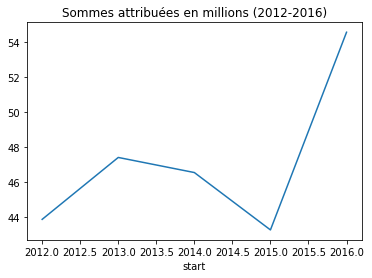

In [1562]:
gb.plot(title="Sommes attribuées en millions (2012-2016)")

## One institution plot

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


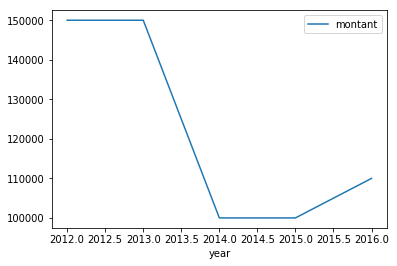

In [1563]:
mjf = df[df['institution'] == "Fond. Montreux Jazz Artists, Montreux"]
mjf['year'] = mjf['start'].apply(lambda x:x.year)
mjf.sort_values('year').plot(x='year', y='montant')

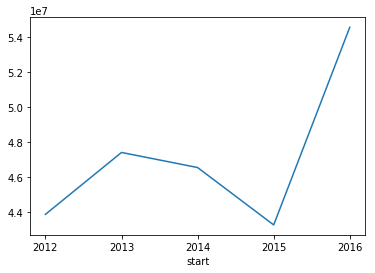

In [1564]:
ddf = df.set_index(df["start"])
ddf['montant'].resample("A").sum().plot()

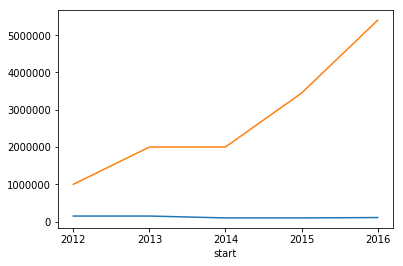

In [1565]:
ddf[ddf["institution"] == "Fond. Montreux Jazz Artists, Montreux"]['montant'].resample("A").sum().plot()
ddf[ddf["institution"] == "Fdt Ruchonnet 18 - Avance pour paiment des factures de la Maison du sport vaud. à Leysin"]['montant'].resample("A").sum().plot()

institution
1066 festival, Epalinges                                                                                                    AxesSubplot(0.125,0.2;0.775x0.68)
20 KM de Lausanne                                                                                                           AxesSubplot(0.125,0.2;0.775x0.68)
4 Roues de Secours et Services Bénévoles de Vevey et Environs, Vevey                                                        AxesSubplot(0.125,0.2;0.775x0.68)
49ème Fête Cantonale des Chanteurs Vaudois Echallens 2017, Bottens                                                          AxesSubplot(0.125,0.2;0.775x0.68)
ABCE - Assoc. des Amis de Bernard Campiche Editeur, La Roche FR                                                             AxesSubplot(0.125,0.2;0.775x0.68)
ABL Mobilité, Prilly                                                                                                        AxesSubplot(0.125,0.2;0.775x0.68)
ABL Mobilité, Renens                    

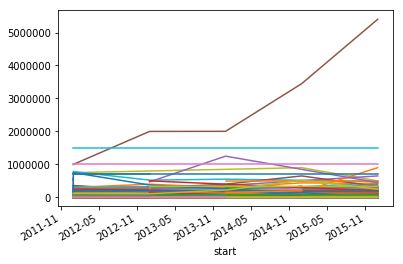

In [1566]:
ddf.groupby("institution")["montant"].plot()

### Yearly evolution of top 10 receivers

In [1567]:
df['start'] = pd.to_datetime(df['start'], format = "%Y-%m-%d")

In [1568]:
def getEvolution(institution):
    ev = df[df['institution'] == institution]
    ev['year'] = ev['start'].apply(lambda x:x.year)
    plot = ev.sort_values('year').plot(x='year', y='montant', title = 'this title', kind='bar')
    return plot

In [1569]:
getEvolution('Athlétissima')

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
df[df['institution'] == "Athlétissima"]

In [ ]:
topten = list(df_sum[:10]['institution'])
for top in topten:
    getEvolution(top)

In [ ]:
ddf.groupby("institution")["montant"].plot()